In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thesis.functions.LSMC import average_lsmc

# LSMC under CEV
## Global constants and regression setup

In [2]:
S_0 = 100    # Initial stock price
r = 0.06    # Stock price risk-neutral mean

T = 1       # Maturity
K = 110     # Strike price

sigma = 0.2     # Volatility constant
gamma = 0.9     # Stock price CEV power

constants = [S_0, r, sigma, gamma]
model = 'cev'

reg_degree = 4
reg_poly = "laguerre"

## Vary the number of time steps N

### Generate and save the results

In [ ]:
L = 100     # Number of simulations
M = 10000   # Number of sample paths

results_N = []

for N in [10, 50, 252, 500]:
    dt = T/N
    time_grid = np.linspace(dt, T, N)

    # Compute the price and the decision boundary using the average_lsmc function
    ave_price_cev, ave_decision_boundary_cev = average_lsmc(L, model, constants, K, M, N, dt, reg_degree, reg_poly)
    
    # Save the obtained decision boundary approximation to npy file
    np.save(f"../results/CEV/decision_boundary_N={N}.npy", ave_decision_boundary_cev)

    # Store the price results
    results_N.append(f"The average price of this American Put option under CEV with {N} time steps is {ave_price_cev}")

# Save the price results to txt file
with open(f"../results/CEV/outputs_vary_N.txt", "w") as f:
    for line in results_N:
        f.write(line + "\n")  

### Plot the decision boundary results

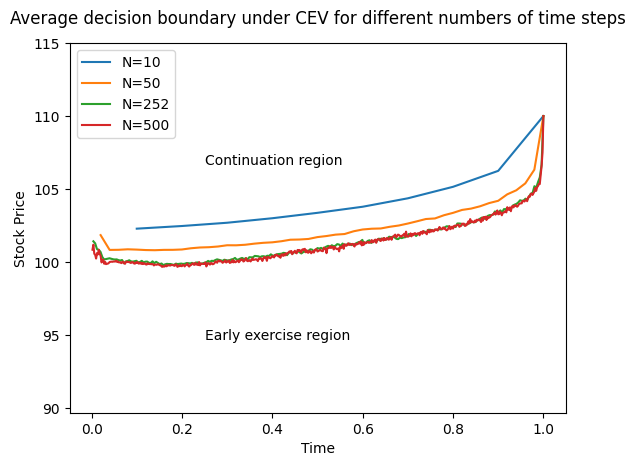

In [4]:
# Load the generated decision boundary approximations
dec_bdd_N_10 = np.load("../results/CEV/decision_boundary_N=10.npy")
dec_bdd_N_50 = np.load("../results/CEV/decision_boundary_N=50.npy")
dec_bdd_N_252 = np.load("../results/CEV/decision_boundary_N=252.npy")
dec_bdd_N_500 = np.load("../results/CEV/decision_boundary_N=500.npy")

# Plot the approximated decision boundaries
plt.plot(np.linspace(1/10, T, 10), dec_bdd_N_10, label='N=10')
plt.plot(np.linspace(1/50, T, 50), dec_bdd_N_50, label='N=50')
plt.plot(np.linspace(1/252, T, 252), dec_bdd_N_252, label='N=252')
plt.plot(np.linspace(1/500, T, 500), dec_bdd_N_500, label='N=500')

min_boundary_N = np.min(np.concatenate([dec_bdd_N_10, dec_bdd_N_50, dec_bdd_N_252, dec_bdd_N_500]))

# Design and save the graph
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Average decision boundary under CEV for different numbers of time steps', y=1.03)
plt.text(T/4, min_boundary_N-5, "Early exercise region")
plt.text(T/4, min_boundary_N+7, "Continuation region")
plt.ylim(min_boundary_N-10, K+5)
plt.savefig("../results/plots/decision_boundary_cev_vary_N.png", bbox_inches='tight')
plt.show()

## Vary the number of sample paths M

### Generate and save the results

In [ ]:
N = 50     # Number of time steps
dt = T/N    
time_grid = np.linspace(dt, T, N)
L = 100     # Number of simulations

results_M = []

for M in [100, 1000, 10000, 1000000]:
    # Compute the price and the decision boundary using the average_lsmc function
    ave_price_cev, ave_decision_boundary_cev = average_lsmc(L, model, constants, K, M, N, dt, reg_degree, reg_poly)
    
    # Save the obtained decision boundary approximation to npy file
    np.save(f"../results/CEV/decision_boundary_M={M}.npy", ave_decision_boundary_cev)

    # Store the price results
    results_M.append(f"The average price of this American Put option under CEV with {M} sample paths is {ave_price_cev}")

# Save the price results to txt file
with open(f"../results/CEV/outputs_vary_M.txt", "w") as f:
    for line in results_M:
        f.write(line + "\n")

### Plot the decision boundary results

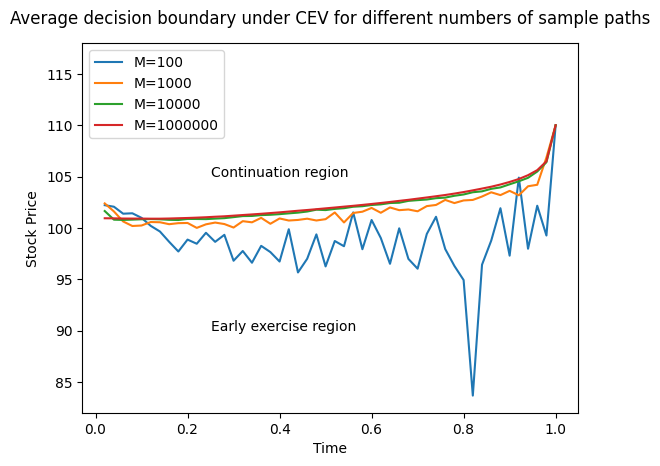

In [7]:
# Load the calculated decision boundary approximations
dec_bdd_M_100 = np.load("../results/CEV/decision_boundary_M=100.npy")
dec_bdd_M_1000 = np.load("../results/CEV/decision_boundary_M=1000.npy")
dec_bdd_M_10000 = np.load("../results/CEV/decision_boundary_M=10000.npy")
dec_bdd_M_1000000 = np.load("../results/CEV/decision_boundary_M=1000000.npy")

# Plot the approximated decision boundaries
N = 50      # Number of time steps
dt = T/N    
time_grid = np.linspace(dt, T, N)
plt.plot(time_grid, dec_bdd_M_100, label='M=100')
plt.plot(time_grid, dec_bdd_M_1000, label='M=1000')
plt.plot(time_grid, dec_bdd_M_10000, label='M=10000')
plt.plot(time_grid, dec_bdd_M_1000000, label='M=1000000')

# Design and save the graph
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Average decision boundary under CEV for different numbers of sample paths', y=1.03)
plt.text(T/4, 90, "Early exercise region")
plt.text(T/4, 105, "Continuation region")
plt.ylim(82, K+8)
plt.savefig("../results/plots/decision_boundary_cev_vary_M.png", bbox_inches='tight')
plt.show()

## Vary the number of simulations L

### Generate and save the results

In [ ]:
N = 252     # Number of time steps
dt = T/N    
time_grid = np.linspace(dt, T, N)
M = 10000   # Number of sample paths

results_L = []

for L in [1, 10, 100, 500]:
    # Compute the price and the decision boundary using the average_lsmc function
    ave_price_cev, ave_decision_boundary_cev = average_lsmc(L, model, constants, K, M, N, dt, reg_degree, reg_poly)
    
    # Save the obtained decision boundary approximation to npy file
    np.save(f"../results/CEV/decision_boundary_L={L}.npy", ave_decision_boundary_cev)

    # Store the price results
    results_M.append(f"The average price of this American Put option under CEV with {L} simulations is {ave_price_cev}")

# Save the price results to txt file
with open(f"../results/CEV/outputs_vary_L.txt", "w") as f:
    for line in results_L:
        f.write(line + "\n")

### Plot the decision boundary results

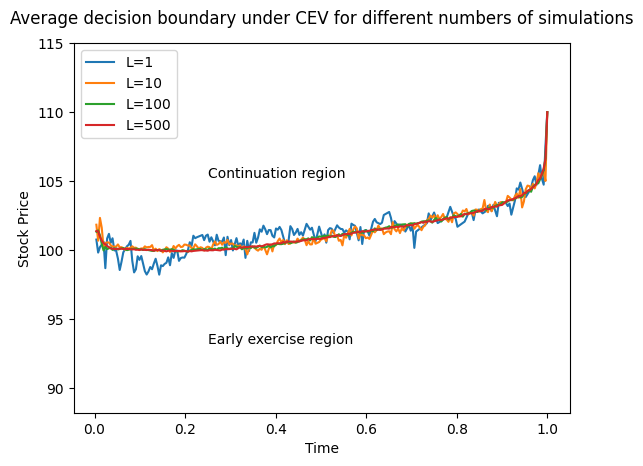

In [15]:
N = 252
dt = T/N    
time_grid = np.linspace(dt, T, N)

# Load the saved results
dec_bdd_L_1 = np.load("../results/CEV/decision_boundary_L=1.npy")
dec_bdd_L_10 = np.load("../results/CEV/decision_boundary_L=10.npy")
dec_bdd_L_100 = np.load("../results/CEV/decision_boundary_L=100.npy")
dec_bdd_L_500 = np.load("../results/CEV/decision_boundary_L=500.npy")

# Plot the approximated decision boundaries
plt.plot(time_grid, dec_bdd_L_1, label=f'L=1')
plt.plot(time_grid, dec_bdd_L_10, label=f'L=10')
plt.plot(time_grid, dec_bdd_L_100, label=f'L=100')
plt.plot(time_grid, dec_bdd_L_500, label=f'L=500')

min_boundary_L = np.min(np.concatenate([dec_bdd_L_1, dec_bdd_L_10, dec_bdd_L_100, dec_bdd_L_500]))

# Design and save the graph
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Average decision boundary under CEV for different numbers of simulations', y=1.03)
plt.text(T/4, min_boundary_L-5, "Early exercise region")
plt.text(T/4, min_boundary_L+7, "Continuation region")
plt.ylim(min_boundary_L-10, K+5)
plt.savefig("../results/plots/decision_boundary_cev_vary_L.png", bbox_inches='tight')
plt.show()